# SDL Project C2
* Kartik Rao      18070122031
* Safeer Khan     18070122031
* Priyanshu Meena 18070122031

# Image Compression

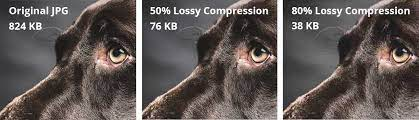

### Need for image compression
* Image compression allows more data to be stored with less disk space.
* Techniques like PCA are used in feature summarization or extraction and data analysis.
* Images in larger data records are required to be of uniform sizes  regardless of their source, thus need to be compressed.

### Types of Image Compression
* Lossless compression
    * Any type of data loss is avoided.
    * Comparatively bigger size.
    * Reversible change

* Lossy compression
    * Retains useful image bits and discards a few to reduce size or extracts important components. 
    * Significantly reduces size.
    * Some data is lost hence the change is irreversible.


# K Means Algorithm

## K Means in General
* K -means clustering is an unsupervised Machine learning technique, that attempts to ﬁnd a user-speciﬁed number of clusters of data points.

* Each cluster in the k-means clustering algorithm is represented by its centroid point.   


## K Means Applied to Image compression
* Images are composed of pixels, and each pixel is essentially composed of Red, blue and green values which are bounded between two values (usually 0 and 255).

* On a 3-d graph, where the axes representing each of the RGB values with scale, we plot a point for every pixel in the given image.

* We then apply the k-means algorithm to cluster the points and reduce the number of colors required to represent the image, thereby compressing it.

* Since the cluster centroid is an approximate replacement for the data points, this becomes a lossy compression

#### We will be using the Inbuilt KMeans function provided by the ScikitLearn Library

In [1]:
#Importing necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from time import time
plt.rcParams['figure.figsize'] = 10,8
from sklearn.cluster import KMeans 
from skimage import io

#### We will import the image

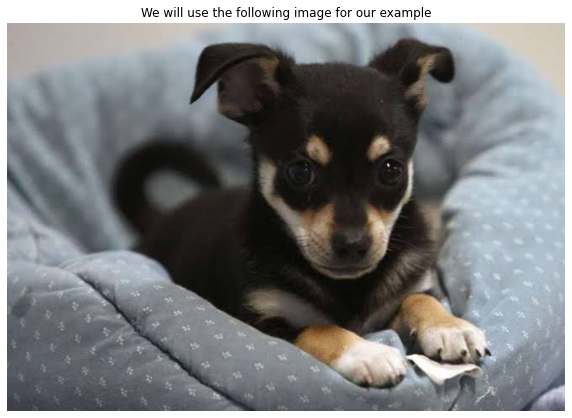

In [3]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTzLzdD4MoAPP3I_JjrxndAqKg1zXtEnaODwsHbH6il9BL3Qt61'
img_original = io.imread(url)
plt.axis('off')
plt.imshow(img_original)
plt.title('We will use the following image for our example')
plt.show()

### Preprocessing the image

* currently the image is composed of three 2d maticies, while we want to plot all pixel values, it will be much easier to get all the pixels in a linear fashion

In [7]:
img = np.array(img_original,dtype=float) / 255

# Save the dimensions, we will be need them later
w, h, d = original_shape = img.shape
print('Original Shape'.center(20,'='))
print(img.shape)

# image_array size - w*h , d
image_array = img.reshape(-1,d)
print('ReShaped'.center(20,'='))
print(image_array.shape)

===Original Shape===
(462, 664, 3)
======ReShaped======
(306768, 3)


### Deciding the number of Clusters
* the number of clusters will decide how many colors will the final image be composed off.
* higher the number of clusters, better the quality but at the cost of size. 

In [9]:
num_clusters=16 #we decide to choose 16 clusters, but we could also choose 32 or 64 as well

### Applylying K-Means algorithm

In [43]:
kmeans = KMeans(n_clusters = num_clusters,random_state=42,verbose=2,n_jobs=-1).fit(image_array)
labels = kmeans.labels_

C:\Users\safee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 857.9004229142517
Iteration 1, inertia 701.019653528938
Iteration 2, inertia 679.9060068958075
Iteration 3, inertia 670.4274965050535
Iteration 4, inertia 665.3598182489973
Iteration 5, inertia 661.6346577350201
Iteration 6, inertia 658.85932962261
Iteration 7, inertia 656.6419812090278
Iteration 8, inertia 655.2880159523057
Iteration 9, inertia 654.0820895294925
Iteration 10, inertia 653.0180513077084
Iteration 11, inertia 652.0011097454101
Iteration 12, inertia 651.2560057686269
Iteration 13, inertia 650.7130513716099
Iteration 14, inertia 650.309423327537
Iteration 15, inertia 649.8087810547286
Iteration 16, inertia 649.3508821509786
Iteration 17, inertia 649.0743280812159
Iteration 18, inertia 648.8402513968647
Converged at iteration 18: center shift 4.54726573004248e-06 within tolerance 5.994688738309841e-06.
Initialization complete
Iteration 0, inertia 937.9094040753324
Iteration 1, inertia 758.9622312100119
Iteration 2, inertia 735.29

Iteration 11, inertia 673.5636367490537
Iteration 12, inertia 673.1217015646955
Iteration 13, inertia 672.6650800311168
Iteration 14, inertia 672.2528582207598
Iteration 15, inertia 671.7250058918922
Iteration 16, inertia 671.309950132945
Iteration 17, inertia 671.0128181985224
Iteration 18, inertia 670.4454206311312
Iteration 19, inertia 669.9798710424994
Iteration 20, inertia 669.5945354072333
Iteration 21, inertia 669.0584250287465
Iteration 22, inertia 668.4165933671848
Iteration 23, inertia 667.9057196462873
Iteration 24, inertia 667.4842571993038
Iteration 25, inertia 667.2637753052893
Iteration 26, inertia 666.9439976495651
Iteration 27, inertia 666.5605968536744
Iteration 28, inertia 666.220333437266
Iteration 29, inertia 665.8082410835967
Iteration 30, inertia 665.5469395852909
Iteration 31, inertia 665.1705495625198
Iteration 32, inertia 664.8394972316099
Converged at iteration 32: center shift 4.710241932722575e-06 within tolerance 5.994688738309841e-06.


### Recreating the image from the centroids
* the labels array maps each pixel to a cluster. We can see that below 

In [41]:
print(labels)
print(labels.shape)

[ 6  6  6 ... 11 11 11]
(306768,)


* We use this information to recreate the image, by creating three 2d Matrix of original dimentions, and mapping the values of the approriate centroids.

In [17]:
def recreate_image(centroids, labels, w, h):
    # centroids variable are calculated from the flattened image
    # centroids: w*h, d 
    # so each row depicts the values per depth
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            # filling values in new image with centroid values
            image[i][j] = centroids[labels[label_idx]]
            label_idx += 1
    return image

 ### Result

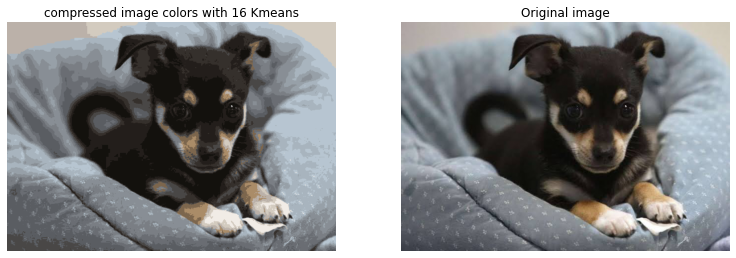

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.subplot(131)
plt.axis('off')
title = "compressed image colors with "+str(num_clusters)+" Kmeans"
plt.title(title)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

# Principle Component Analysis

PCA is a dimenionality reduction technique thats mostly used for feature extraction.

## PCA Applied to Image compression

In [125]:
# IMPORT NECESSARY LIBRARIES
import matplotlib
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import scipy.misc
from sklearn.decomposition import PCA, IncrementalPCA

In [126]:
# IMPORTING IMAGE USING SCIPY AND TAKING R,G,B COMPONENTS
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTzLzdD4MoAPP3I_JjrxndAqKg1zXtEnaODwsHbH6il9BL3Qt61'
img_original = io.imread(url)
a_np = np.array(img_original)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

In [127]:
numpc = 50 # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS

In [128]:
def new_some(a_r_):
    ipca = IncrementalPCA(n_components=numpc)
    image_compressed = ipca.inverse_transform(ipca.fit_transform(a_r_))
    return np.uint8(np.absolute(image_compressed)) 

In [132]:
a_r_recon, a_g_recon, a_b_recon = new_some(a_r), new_some(a_g), new_some(a_b) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
red_temp = Image.fromarray(a_r_recon)
red_temp = Image.fromarray(a_g_recon)
blue_temp = Image.fromarray(a_b_recon)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = Image.fromarray(recon_color_img)
#recon_color_img.show()
recon_color_img.save('new.jpg')

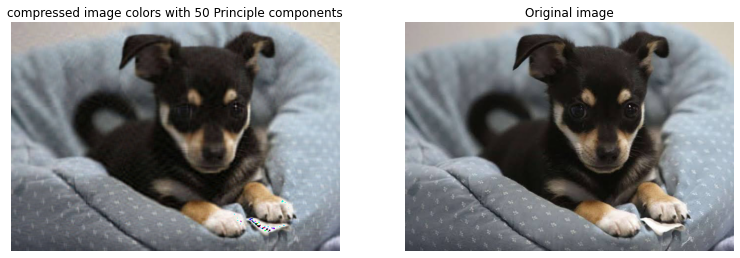

In [133]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img_original)

plt.subplot(131)
plt.axis('off')
title = "compressed image colors with "+str(numpc)+" Principle components"
plt.title(title)
plt.imshow(recon_color_img)
plt.show()